<a href="https://colab.research.google.com/github/Diacod-I/moore/blob/main/Moore's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-12-31 08:37:41--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-12-31 08:37:41 (41.5 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [139]:
data = pd.read_csv("moore.csv", header=None).to_numpy()

In [140]:
X = data[:,0].reshape(-1,1)
Y = data[:,1]

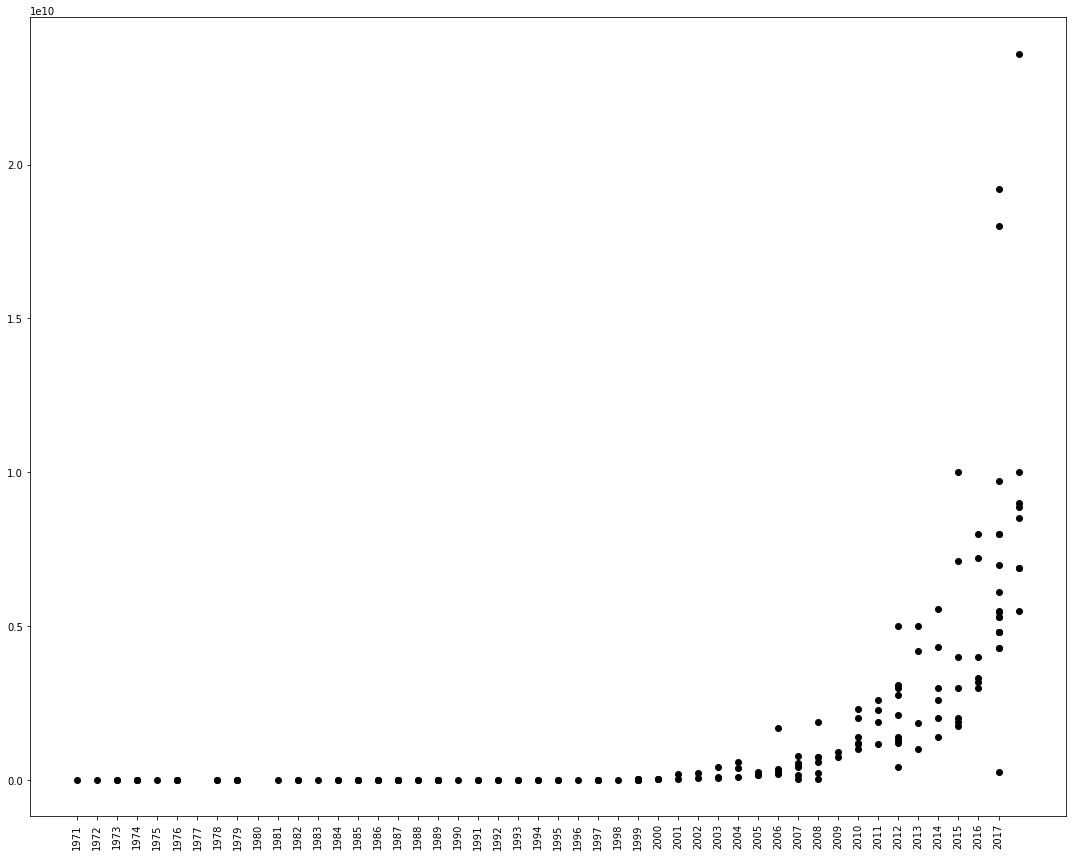

In [141]:
plt.rcParams["figure.figsize"]=(15,12)
plt.rcParams['figure.autolayout'] = True
plt.scatter(X,Y,c='black')
plt.xticks(np.arange(1971,2018,step=1),rotation=90)
plt.show()

In [142]:
Y=np.log(Y)

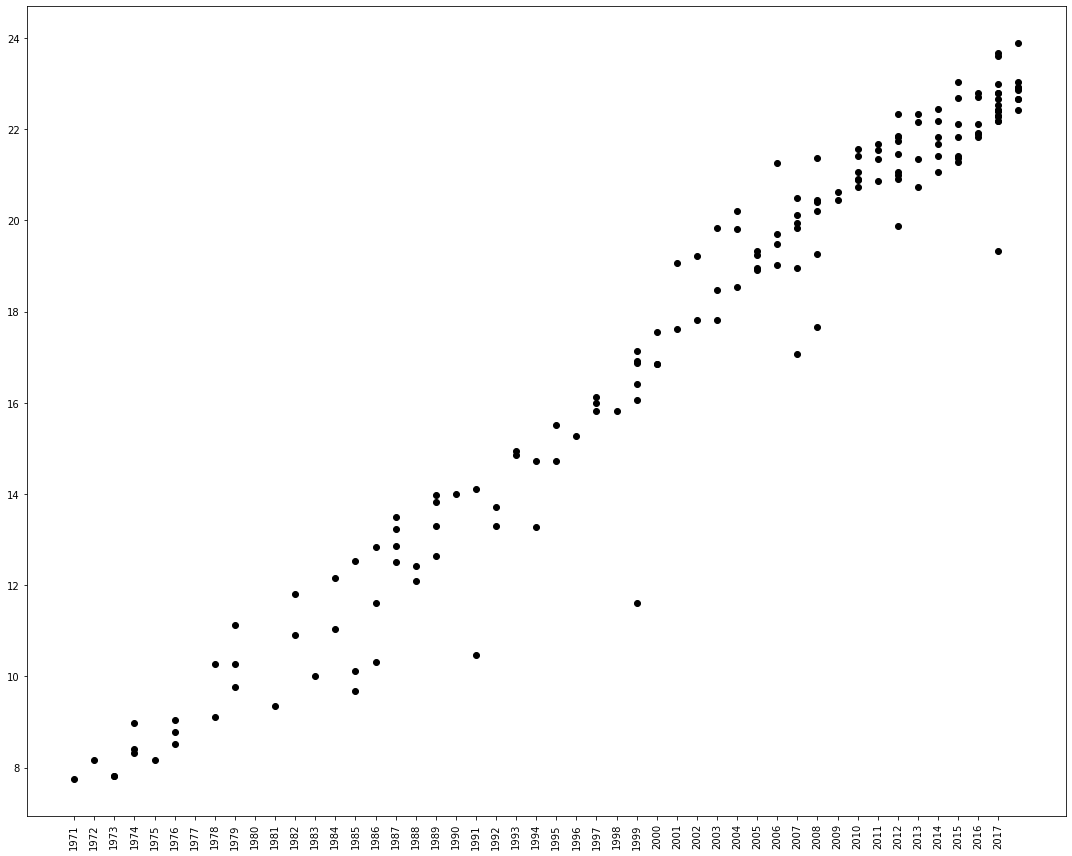

In [143]:
plt.scatter(X,Y,c='black')
plt.xticks(np.arange(1971,2018,step=1),rotation=90)
plt.show()

In [144]:
X = X-X.mean()

In [151]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [152]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.0001,0.9),
    loss = 'mse'
)

In [153]:
def schedule(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [154]:
r = model.fit(X,Y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 337.3166 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 281.4401 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 238.4184 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 193.1868 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 155.6193 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 112.2975 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 85.7134 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 64.3774 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 55.0147 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 39.5439 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 2

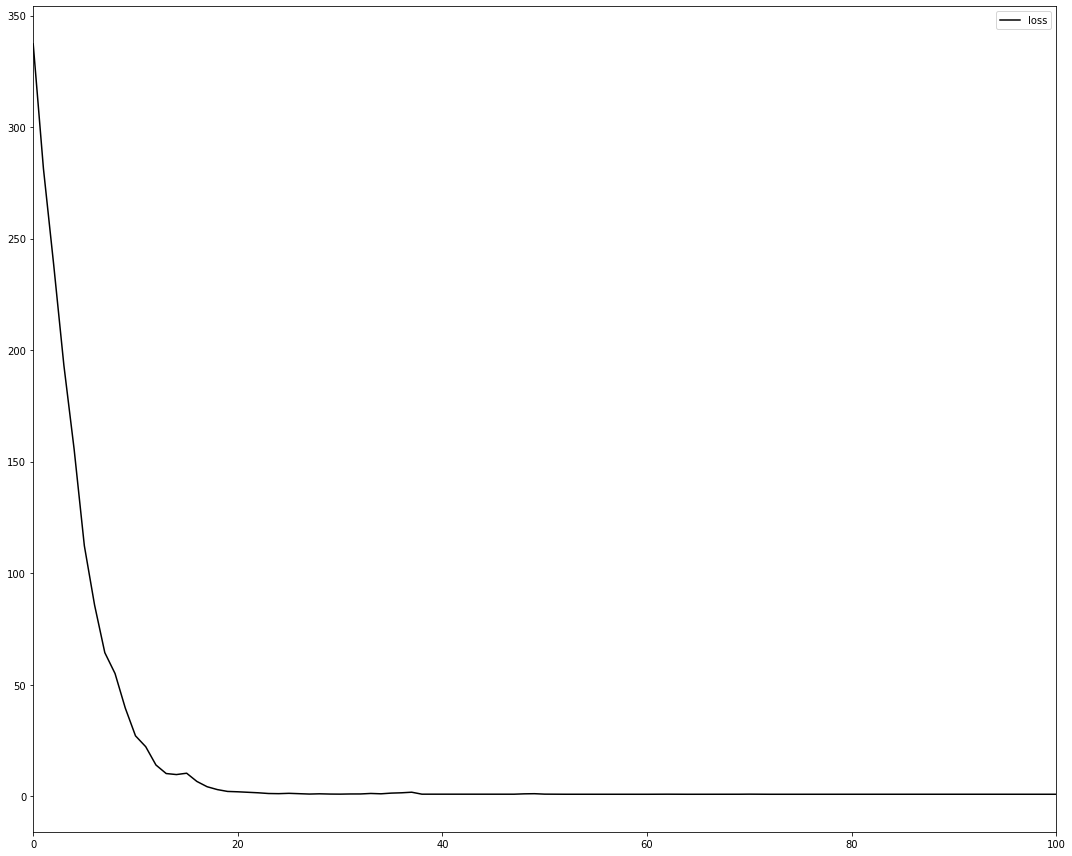

In [155]:
plt.plot(r.history['loss'],label='loss',color='black')
plt.legend()
plt.xlim(0,100)
plt.show()

In [156]:
model.layers[0].get_weights()

[array([[0.34684435]], dtype=float32), array([17.780413], dtype=float32)]

In [157]:
a = model.layers[0].get_weights()[0][0,0]
a

0.34684435

###Exponential Growth Formula for Transistor growth

> ***C = A<sub>0</sub>r<sup>t</sup>***

where *C* is the transistor count<br>*t* is the year<br>*r* is the rate of growth<br>*A<sub>0</sub>* is the initial transistor count (from the year 1971 for the dataset used)

###Logarithmic Representation

> ***log C =  t (log r) + log A<sub>0</sub>***

which is the linear equation 
> ***y = ax + b***

So *y = log C* and *x = t*
<br>Also *log r = a* and given our regression weights, we know that:

> a = 0.34684435

Therefore, ***r = e<sup>0.34684435</sup> = 1.414596526***
<br>Now to find time to double, we simply need to calculate for *2C*

So dividing the double growth formula with the original growth formula, we get:


> ***2C/C = A<sub>0</sub>r<sup>t'</sup>/A<sub>0</sub>r<sup>t</sup>***
<br>=> ***2 = r<sup>(t' - t)***

Solving for *(t' - t)*,


> ***(t' - t) = log 2 / log r = log 2 / a*** 





In [158]:
dubtime = np.log(2)/a
print("Time to double:",dubtime,'years')

Time to double: 1.9984387518213056 years


In [159]:
X = np.array(X).flatten()
Y = np.array(Y).flatten()
print(X,'\n')
print(Y)

[-31.19753086 -30.19753086 -29.19753086 -29.19753086 -28.19753086
 -28.19753086 -28.19753086 -27.19753086 -26.19753086 -26.19753086
 -26.19753086 -24.19753086 -24.19753086 -23.19753086 -23.19753086
 -23.19753086 -21.19753086 -20.19753086 -20.19753086 -19.19753086
 -18.19753086 -18.19753086 -17.19753086 -17.19753086 -17.19753086
 -16.19753086 -16.19753086 -16.19753086 -15.19753086 -15.19753086
 -15.19753086 -15.19753086 -14.19753086 -14.19753086 -13.19753086
 -13.19753086 -13.19753086 -13.19753086 -12.19753086 -11.19753086
 -11.19753086 -10.19753086 -10.19753086  -9.19753086  -9.19753086
  -8.19753086  -8.19753086  -7.19753086  -3.19753086  -7.19753086
  -6.19753086  -5.19753086  -5.19753086  -5.19753086  -4.19753086
  -3.19753086  -3.19753086  -2.19753086  -2.19753086  -3.19753086
  -3.19753086  -3.19753086  -2.19753086  -1.19753086  -1.19753086
  -0.19753086   1.80246914   1.80246914   2.80246914   3.80246914
   2.80246914   3.80246914   4.80246914   5.80246914   0.80246914
   0.80246

In [160]:
denom = X.dot(X) - X.mean()*X.sum()
denom

30173.67901234569

In [161]:
a = (X.dot(Y) - Y.mean()*X.sum())/denom
b = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y))/denom
print('a and b values are',a,',',b,'which is almost the same value as that of the model weights')

a and b values are 0.341682487387313 , 17.764939393631764 which is almost the same value as that of the model weights


6/6 [==============================] - 0s 2ms/step


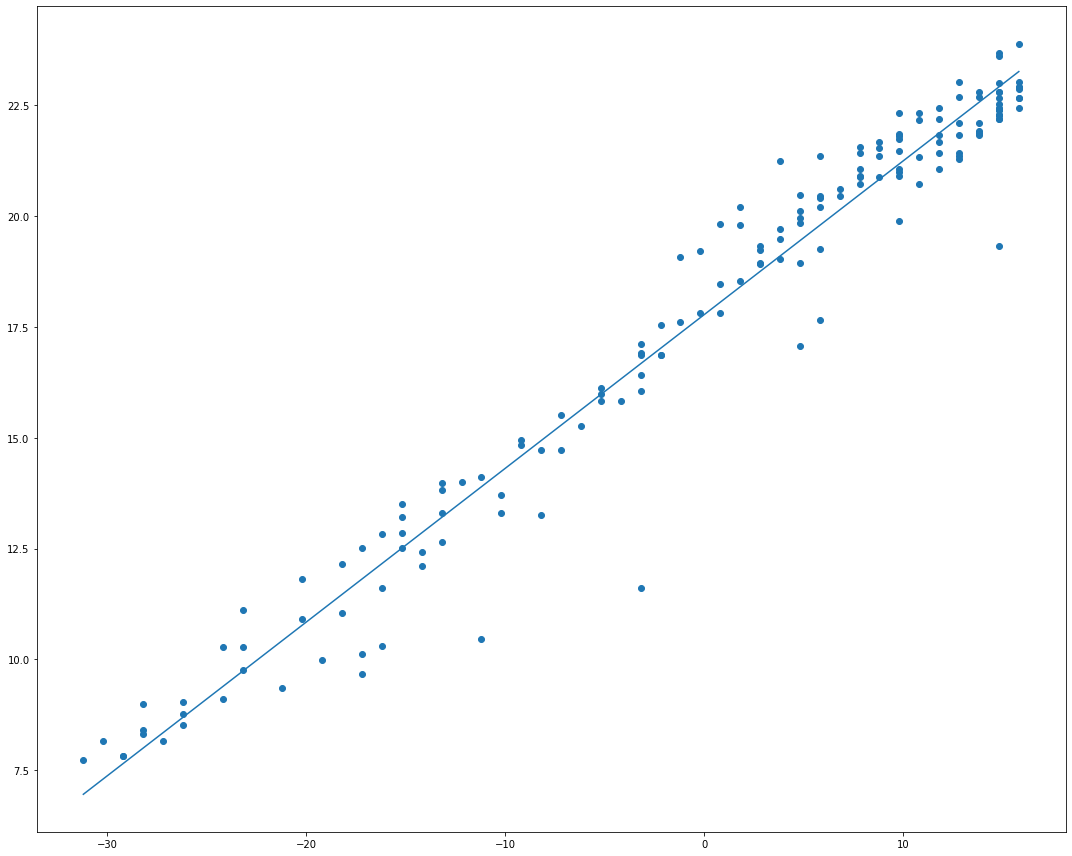

In [162]:
Yt = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yt)

In [163]:
w,b = model.layers[0].get_weights()
X = X.reshape(-1,1)
Yt2 = (X.dot(w) + b).flatten()
np.allclose(Yt,Yt2) #allclose returns true when both arrays have equal elements with a certain tolerance limit

True

In [164]:
Yt

array([ 6.9597254,  7.30657  ,  7.653414 ,  7.653414 ,  8.000258 ,
        8.000258 ,  8.000258 ,  8.347103 ,  8.693947 ,  8.693947 ,
        8.693947 ,  9.387636 ,  9.387636 ,  9.73448  ,  9.73448  ,
        9.73448  , 10.428169 , 10.775013 , 10.775013 , 11.121858 ,
       11.468702 , 11.468702 , 11.815546 , 11.815546 , 11.815546 ,
       12.162391 , 12.162391 , 12.162391 , 12.509235 , 12.509235 ,
       12.509235 , 12.509235 , 12.856079 , 12.856079 , 13.202924 ,
       13.202924 , 13.202924 , 13.202924 , 13.549768 , 13.896612 ,
       13.896612 , 14.243457 , 14.243457 , 14.5903015, 14.5903015,
       14.937145 , 14.937145 , 15.28399  , 16.671368 , 15.28399  ,
       15.630835 , 15.977678 , 15.977678 , 15.977678 , 16.324522 ,
       16.671368 , 16.671368 , 17.018211 , 17.018211 , 16.671368 ,
       16.671368 , 16.671368 , 17.018211 , 17.365055 , 17.365055 ,
       17.7119   , 18.405588 , 18.405588 , 18.752434 , 19.099277 ,
       18.752434 , 19.099277 , 19.446121 , 19.792967 , 18.0587

In [165]:
Yt2

array([ 6.95972551,  7.30656985,  7.6534142 ,  7.6534142 ,  8.00025854,
        8.00025854,  8.00025854,  8.34710289,  8.69394723,  8.69394723,
        8.69394723,  9.38763592,  9.38763592,  9.73448027,  9.73448027,
        9.73448027, 10.42816896, 10.7750133 , 10.7750133 , 11.12185765,
       11.46870199, 11.46870199, 11.81554634, 11.81554634, 11.81554634,
       12.16239069, 12.16239069, 12.16239069, 12.50923503, 12.50923503,
       12.50923503, 12.50923503, 12.85607938, 12.85607938, 13.20292372,
       13.20292372, 13.20292372, 13.20292372, 13.54976807, 13.89661241,
       13.89661241, 14.24345676, 14.24345676, 14.5903011 , 14.5903011 ,
       14.93714545, 14.93714545, 15.28398979, 16.67136717, 15.28398979,
       15.63083414, 15.97767848, 15.97767848, 15.97767848, 16.32452283,
       16.67136717, 16.67136717, 17.01821152, 17.01821152, 16.67136717,
       16.67136717, 16.67136717, 17.01821152, 17.36505587, 17.36505587,
       17.71190021, 18.4055889 , 18.4055889 , 18.75243325, 19.09